# Inferential statistics
## Part I - Data Cleaning

Your family is very passionate about basketball. You always have discussions over players, games, statistics and whatnot. As you can imagine those discussions never reach a conclusion since everyone is simply sharing their opinion with no statistics to back them up!

![](../images/basket.jpg)

Since you are attending a data analysis bootcamp you'd like to take advantage of your newfound knowledge to finally put an end to your family's discussions. 

Luckily we have found a dataset containing data related to the players of the WNBA for the 2016-2017 season that we can use. 

Let's start with cleaning the data and then we'll continue with a general exploratory analysis and some inferential statistics.

### Dataset

The dataset we will be using contains the statistics from the WNBA players for the 2016-2017 season. You will be able to find more information on the dataset in the [codebook](../data/codebook.md) uploaded to the repository.

### Libraries

First we'll import the necessary libraries first and increase the maximum number of displayed columns so you will be able to see all the dataset in the same window.

In [42]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
pd.set_option('max_columns', 100)

### Load the dataset

Load the dataset into a df called `wnba` and take an initial look at it using the `head()` method.

In [8]:
#your code here
wnba = pd.read_csv('../data/wnba.csv')
wnba.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0   January 17, 1994   23  Michigan State          2             8  173   30   
1       May 14, 1982   35            Duke         12            30  947   90   
2   October 27, 1990   26      Penn State          4            26  617   82   
3  December 11, 1988   28    Georgia Tech          6            31  721   75   
4     August 5, 1994   23          Baylor          R            24  137   16   

   FGA   FG%  3PM  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  \
0   85  35.3   12   32  37.5   21   26  80.8     6    22   28   12    3    6   
1  177  50.8    5   18  27.8   32   41  78.0    19    82  101   72   63   13   
2  218  37.6   19   64  29.7   35   42  83.3     4    36   40   78   22    3   
3  195  38.5   21   68  30.9   17   21  81.0    35   134  169   65   20   10   
4   50  32.0    7   20  35.0   11   12  91.7     3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0    0  
3  38  188    2    0  
4  14   50    0    0

### Check NaN values
As you know, one of our first steps is to check if there are any NaN values in the dataset to find any issues. Look for the columns that cointain NaN values and count how many rows there are with that value.

In [9]:
#your code here
null_cols = wnba.isnull().sum()
null_cols[null_cols > 0]

Weight    1
BMI       1
dtype: int64

We can see that there are only two NaNs in the whole dataset, one in the Weight column and one in the BMI one. Let's look at the actual rows that contain the NaN values.

In [16]:
#your code here
wnba.loc[(wnba['Weight'].isnull() == True) | (wnba['BMI'].isnull() == True)]

Name Team Pos  Height  Weight  BMI Birth_Place     Birthdate  Age  \
91  Makayla Epps  CHI   G     178     NaN  NaN          US  June 6, 1995   22   

     College Experience  Games Played  MIN  FGM  FGA   FG%  3PM  3PA  3P%  \
91  Kentucky          R            14   52    2   14  14.3    0    5  0.0   

    FTM  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TO  PTS  DD2  TD3  
91    2    5  40.0     2     0    2    4    1    0   4    6    0    0

It looks like there is only a single row that has NaN values in it, which is good! Just in case, let's check how much removing a single row may influence our dataset by calculating the percentage of values we will be removing.

In [27]:
#your code here
drop_percentage = 1 / wnba.shape[0] * 100 
print("If we drop the NaN values, we drop {0:.3f} of all values".format(drop_percentage))

If we drop the NaN values, we drop 0.699 of all values


It is very important to be as careful as possible when dealing with NaN values and only drop data when it is strictly necessary. This decision can also be influenced by the nature of our analysis. If, for example, our analysis will not require the Weight and BMI of the players at all we can simply keep the row, given that the NaN values are only present in the Weight and BMI column.

In this specific example, let's say our decision is to drop it. Write some code to drop the NaN values. 

In [31]:
#your code here
wnba1 = wnba.dropna()
wnba1

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0       Aerial Powers  DAL    F     183    71.0  21.200991          US   
1         Alana Beard   LA  G/F     185    73.0  21.329438          US   
2        Alex Bentley  CON    G     170    69.0  23.875433          US   
3     Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4        Alexis Jones  MIN    G     175    78.0  25.469388          US   
..                ...  ...  ...     ...     ...        ...         ...   
138     Tiffany Hayes  ATL    G     178    70.0  22.093170          US   
139   Tiffany Jackson   LA    F     191    84.0  23.025685          US   
140  Tiffany Mitchell  IND    G     175    69.0  22.530612          US   
141      Tina Charles   NY  F/C     193    84.0  22.550941          US   
142     Yvonne Turner  PHO    G     175    59.0  19.265306          US   

              Birthdate  Age         College Experience  Games Played  MIN  \
0      January 17, 1994   23  Michigan State          2             8  173   
1          May 14, 1982   35            Duke         12            30  947   
2      October 27, 1990   26      Penn State          4            26  617   
3     December 11, 1988   28    Georgia Tech          6            31  721   
4        August 5, 1994   23          Baylor          R            24  137   
..                  ...  ...             ...        ...           ...  ...   
138  September 20, 1989   27     Connecticut          6            29  861   
139      April 26, 1985   32           Texas          9            22  127   
140  September 23, 1984   32  South Carolina          2            27  671   
141        May 12, 1988   29     Connecticut          8            29  952   
142    October 13, 1987   29        Nebraska          2            30  356   

     FGM  FGA   FG%  3PM  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  \
0     30   85  35.3   12   32  37.5   21   26  80.8     6    22   28   12   
1     90  177  50.8    5   18  27.8   32   41  78.0    19    82  101   72   
2     82  218  37.6   19   64  29.7   35   42  83.3     4    36   40   78   
3     75  195  38.5   21   68  30.9   17   21  81.0    35   134  169   65   
4     16   50  32.0    7   20  35.0   11   12  91.7     3     9   12   12   
..   ...  ...   ...  ...  ...   ...  ...  ...   ...   ...   ...  ...  ...   
138  144  331  43.5   43  112  38.4  136  161  84.5    28    89  117   69   
139   12   25  48.0    0    1   0.0    4    6  66.7     5    18   23    3   
140   83  238  34.9   17   69  24.6   94  102  92.2    16    70   86   39   
141  227  509  44.6   18   56  32.1  110  135  81.5    56   212  268   75   
142   59  140  42.1   11   47  23.4   22   28  78.6    11    13   24   30   

     STL  BLK  TO  PTS  DD2  TD3  
0      3    6  12   93    0    0  
1     63   13  40  217    0    0  
2     22    3  24  218    0    0  
3     20   10  38  188    2    0  
4      7    0  14   50    0    0  
..   ...  ...  ..  ...  ...  ...  
138   37    8  50  467    0    0  
139    1    3   8   28    0    0  
140   31    5  40  277    0    0  
141   21   22  71  582   11    0  
142   18    1  32  151    0    0  

[142 rows x 32 columns]

In [32]:
wnba.shape

(143, 32)

**Do you think it is a good decision? Think about a case in which you wouldn't want to drop the value.**

In [33]:
#your answer here
'''
There are a couple of reasons why we would decide to not drop the NaN values.
1. The missing data does not influence our analysis
2. We can calculate the missing data, for example if we knew weight we could have calculated BMI
3. The number of missing values is too high relative to the sample size and dropping them would negatively 
influence your final results
'''

'\nThere are a couple of reasons why we would decide to not drop the NaN values.\n1. The missing data does not influence our analysis\n2. We can calculate the missing data, for example if we knew weight we could have calculated BMI\n3. The number of missing values is too high relative to the sample size and dropping them would negatively \ninfluence your final results\n'

### Let's make an overview of the dataset
First, check the data types of our data:

In [34]:
#your code here
wnba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
Name            142 non-null object
Team            142 non-null object
Pos             142 non-null object
Height          142 non-null int64
Weight          142 non-null float64
BMI             142 non-null float64
Birth_Place     142 non-null object
Birthdate       142 non-null object
Age             142 non-null int64
College         142 non-null object
Experience      142 non-null object
Games Played    142 non-null int64
MIN             142 non-null int64
FGM             142 non-null int64
FGA             142 non-null int64
FG%             142 non-null float64
3PM             142 non-null int64
3PA             142 non-null int64
3P%             142 non-null float64
FTM             142 non-null int64
FTA             142 non-null int64
FT%             142 non-null float64
OREB            142 non-null int64
DREB            142 non-null int64
REB             142 non-null int64
AST

It looks like most of the data types are correct. Birthdate column could be casted to a `datetime` type, however, we won't use it in our analysis so for simplicity, let's leave it as an `object`. Weight column could also be casted to an `int64` type as all numbers are integers.

**Let's change the type of Weight column for practice.**

In [39]:
#your code here
wnba2 = wnba1.astype({'Weight': int})
wnba2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
Name            142 non-null object
Team            142 non-null object
Pos             142 non-null object
Height          142 non-null int64
Weight          142 non-null int64
BMI             142 non-null float64
Birth_Place     142 non-null object
Birthdate       142 non-null object
Age             142 non-null int64
College         142 non-null object
Experience      142 non-null object
Games Played    142 non-null int64
MIN             142 non-null int64
FGM             142 non-null int64
FGA             142 non-null int64
FG%             142 non-null float64
3PM             142 non-null int64
3PA             142 non-null int64
3P%             142 non-null float64
FTM             142 non-null int64
FTA             142 non-null int64
FT%             142 non-null float64
OREB            142 non-null int64
DREB            142 non-null int64
REB             142 non-null int64
AST  

**After checking the data types, let's check for outliers using the describe() method.**

In [40]:
#your code here
wnba2.describe()

Height      Weight         BMI         Age  Games Played  \
count  142.000000  142.000000  142.000000  142.000000    142.000000   
mean   184.612676   78.978873   23.091214   27.112676     24.429577   
std      8.698128   10.996110    2.073691    3.667180      7.075477   
min    165.000000   55.000000   18.390675   21.000000      2.000000   
25%    175.750000   71.500000   21.785876   24.000000     22.000000   
50%    185.000000   79.000000   22.873314   27.000000     27.500000   
75%    191.000000   86.000000   24.180715   30.000000     29.000000   
max    206.000000  113.000000   31.555880   36.000000     32.000000   

               MIN         FGM         FGA         FG%         3PM  \
count   142.000000  142.000000  142.000000  142.000000  142.000000   
mean    500.105634   74.401408  168.704225   43.102817   14.830986   
std     289.373393   55.980754  117.165809    9.855199   17.372829   
min      12.000000    1.000000    3.000000   16.700000    0.000000   
25%     242.250000   27.000000   69.000000   37.125000    0.000000   
50%     506.000000   69.000000  152.500000   42.050000   10.500000   
75%     752.500000  105.000000  244.750000   48.625000   22.000000   
max    1018.000000  227.000000  509.000000  100.000000   88.000000   

              3PA         3P%         FTM         FTA         FT%        OREB  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean    43.697183   24.978169   39.535211   49.422535   75.828873   22.063380   
std     46.155302   18.459075   36.743053   44.244697   18.536151   21.519648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000   13.000000   17.250000   71.575000    7.000000   
50%     32.000000   30.550000   29.000000   35.500000   80.000000   13.000000   
75%     65.500000   36.175000   53.250000   66.500000   85.925000   31.000000   
max    225.000000  100.000000  168.000000  186.000000  100.000000  113.000000   

             DREB         REB         AST         STL         BLK          TO  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean    61.591549   83.654930   44.514085   17.725352    9.781690   32.288732   
std     49.669854   68.200585   41.490790   13.413312   12.537669   21.447141   
min      2.000000    2.000000    0.000000    0.000000    0.000000    2.000000   
25%     26.000000   34.250000   11.250000    7.000000    2.000000   14.000000   
50%     50.000000   62.500000   34.000000   15.000000    5.000000   28.000000   
75%     84.000000  116.500000   66.750000   27.500000   12.000000   48.000000   
max    226.000000  334.000000  206.000000   63.000000   64.000000   87.000000   

              PTS         DD2         TD3  
count  142.000000  142.000000  142.000000  
mean   203.169014    1.140845    0.007042  
std    153.032559    2.909002    0.083918  
min      2.000000    0.000000    0.000000  
25%     77.250000    0.000000    0.000000  
50%    181.000000    0.000000    0.000000  
75%    277.750000    1.000000    0.000000  
max    584.000000   17.000000    1.000000

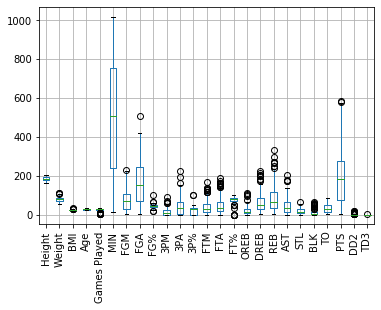

In [44]:
wnba2.boxplot(rot=90)

**Comment on your result. What do you see?**

In [46]:
#your answer here
''' 
With the describe() method it is hard to spot the outliers. 
The boxplot() method from matplotlib provides us with an easy tool to spot significant outliers.
As seen in the boxplot there are multiple outliers in different categories such as FGA, 3PM, 3PA, FTM, FTA, OREB, DREB, REB, STL, etc'''


' \nWith the describe() method it is hard to spot the outliers. \nThe boxplot() method from matplotlib provides us with an easy tool to spot significant outliers.\nAs seen in the boxplot there are multiple outliers in different categories such as FGA, 3PM, 3PA, FTM, FTA, OREB, DREB, REB, STL, etc'

**Now we can save the cleaned data to a new .csv file called `wnba_clean.csv` in the data folder.**

In [47]:
#your code here
wnba2.to_csv (r'../data/wnba_clean2.csv', index = False, header=True)